In [131]:
import math; 
import statistics;
from IPython.display import Image; # Image(filename='example.jpg') or ![test](example.PNG)
from scipy.stats import norm;
from matplotlib import pyplot as plot;

<h1> IEE534 Assignment 2 </h1>

<h2> Question 1 </h2>

<h3> 1. (Newsvendor Model) A large mining company plans to purchase 100 customized pneumatic rock-drills whose drilling
tools break occasionally and need to be changed. Spare tools can be purchased at the time that the order is placed for
\$50 each, but will cost \$170 if purchased at a later time since the tools are designed and manufactured according to the
firm’s specifications. It is estimated that the number of replacement drill tools required by a rock-drill over its useful
lifetime can be approximated by a Normal distribution with mean 18 and standard deviation of 5.2. The supplier for
the rock-drills agrees to buy back any unused drill tools for \$20 each. How many spare drill tools should the company
purchase with the rock-drills?
 </h3>

In [4]:
mean = 18;
SD = 5.2;
overage = 50-20;
underage = 170-50;

CR = underage/(overage+underage);
Phi_z = round(norm.ppf(CR),2);

Q = round((SD*Phi_z)+mean);

print("The number of spare drill tools the company should purchase with the rocks drills is:",Q);

The number of spare drill tools the company should purchase with the rocks drills is: 22.0


<h2> Question 2 </h2>

<h3> 2. . (Newsvendor Model) Irwin’s sells a particular model of fan, with most of the sales being made in the summer months.
Irwin’s makes a one-time purchase of the fans prior to each summer session at a cost of \$40.00 each and sells each fan
for only \$60.00. Any fans unsold at the end of the summer season are marked down to \$29.00 and sold in a special fall
sale. Virtually all marked down fans are sold. The following is the number of sales of fans during the past 10 summers:
30, 50, 30, 60, 10, 40, 30, 30, 20, 40.
 </h3>

<h4> 
    (a) Estimate the mean and variance of the demand for fans each summer.
</h4>

In [28]:
mean = ((30+50+30+60+10+40+30+30+20+40)/10);

SalesList = [30,50,30,60,10,40,30,30,20,40];
VarList = [];
for i in SalesList:
    VarList.append(math.pow((i - mean),2)); #calculating variance (e-mu)^2 for each amount
    
variance = statistics.mean(VarList); #finding mean of variances

print("The mean of the demand for fans is:",mean,"and the variance is:",variance);

The mean of the demand for fans is: 34.0 and the variance is: 184.0


<h4>
    (b) Assume that the demand for fans each summer follows a Normal distribution, with mean and variance given by what
you obtained in part (a). Determine the optimal number of fans for Irwin’s to buy prior to each summer session.
</h4>

In [29]:
mean = 34;
variance = 184;
SD = math.sqrt(variance);
overage = 40-29;
underage = 60-40;

CR = underage/(overage+underage);
Phi_z = round(norm.ppf(CR),2);

Q = round((SD*Phi_z)+mean);

print("The optimal number of fans for Irwin's to buy prior to each summer session is:",Q);

The optimal number of fans for Irwin's to buy prior to each summer session is: 39.0


![q2p1](q2p1.PNG)

The new optimal ordering size based on empricial distrbiution is: 44.0 
 the new mean is: 34.0 
 the new variance is: 742.22


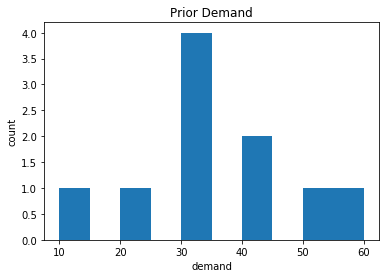

In [153]:
#histogram
SalesList = [30,50,30,60,10,40,30,30,20,40];
ListLength = len(SalesList);
plot.hist(SalesList)
plot.ylabel('count')
plot.xlabel('demand')
plot.title('Prior Demand')

#mean, variance, and OOQ
ProbOf10 = 1/10;
ProbOf20 = 1/10;
ProbOf30 = 4/10;
ProbOf40 = 2/10;
ProbOf50 = 1/10;
ProbOf60 = 1/10;

n=10;
EMean = (sum(SalesList))/n;
EVarList = [];
for i in SalesList:
    EVarList.append(math.pow((i - mean),2)); #calculating variance (e-mu)^2 for each amount
    
ESum = sum(EVarList); #finding mean of variances
EVar = round((ESum/(n-1)),2);
ESD = math.sqrt(EVar);

Eoverage = 40-29; #same as before
Eunderage = 60-40; #same as before

ECR = Eunderage/(Eoverage+Eunderage);
EPhi_z = round(norm.ppf(ECR),2);

EQ = round((ESD*EPhi_z)+EMean);


print("The new optimal ordering size based on empricial distrbiution is:",EQ,
     "\n the new mean is:",EMean,"\n the new variance is:",EVar);

<h4>
    (d) Based on your results for parts (b) and (c), would you say that the Normal distribution provides an adequate
approximation?
</h4>

In [ ]:
# Based on my results for parts b and c, I would say that the normal distribution provides an adequate approximation 
# because the mean is 34, which is not off from the approximation of 39 when normally distributed. It may seem absurd 
# because there are summers like 10 and 60; however, just because the standard deviation is high doesn't mean approximation
# isn't somewhat adequate. Not to mention it is $9 cheaper per unit to have overage than underage. Thus, because the 
# resulting approximation from the normal distribution is close to the mean and favors overage, it is adequate. 

<h2> Question 3 </h2>

<h3> 3. The owner of Kwik-Print, Jack Proffitts, orders office paper for the photocopy machines in his shop. Demand for paper in the shop is approximately 30 packages per week, but it is quite variable (i.e., it is appropriate to use the Normal (not Poisson) distribution to model the demand). Mr. Proffitts has just recently read an article about the (Q, r) policy, and would like to use it to control stock levels of paper in Kwik-Print. Each package of paper costs \$4.00, but no information is available on the ordering and stockout/backorder costs. The replenishment lead time is one week. </h3>

<h4> 
    (a) Although Mr. Proffitts does not know the ordering costs, he knows that he does not want to order more than once
every two weeks (26 orders/year). What order size should he use?
</h4>

In [83]:
D = 30; #units per week
c = 4; #cost per unit

#Assuming 52 weeks and 365 days in a year:
YearlyDemand = 52*30;
DailyDemand = math.ceil(D/7);
LeadTimeDemand = DailyDemand*7;
CycleTimeDemand = YearlyDemand/26; #to ensure no more than 26 weeks we'll find the worst case scenario

OrderSize = CycleTimeDemand+LeadTimeDemand; #accounts for deamnd in each order plus demand during lead time

print("To order no more than once every two weeks, he should use and order size of:",OrderSize);

To order no more than once every two weeks, he should use and order size of: 95.0


<h4>
    (b) How much safety stock does he have to carry in order to ensure a 98% fill rate?
</h4>

In [170]:
#I'm calculating part b based on the assumption that we're looking at a 2-week safetystock (via part a) needed for demand
WeeklyDemand = 30;
DailyDemand = math.ceil(WeeklyDemand/7);
YearlyDemand = 52*30;
CycleTimeDemand = YearlyDemand/26;
NeededFillRate = .98; #1-(ExpectedNotFilled/ExpectedDemand)

# The following is the ceiling of filling 98% of demand in each scenario,ensuring >98% of demand over that period can be filled
DailyDemandFilled = math.ceil(NeededFillRate*DailyDemand);
WeeklyDemandFilled = math.ceil(NeededFillRate*WeeklyDemand);
YearlyDemandFilled = math.ceil(NeededFillRate*YearlyDemand);
CycleDemandFilled = math.ceil(NeededFillRate*CycleTimeDemand);

SafetyStock = NeededFillRate*CycleDemandNotFilled;

print("To ensure a 98% Fill Rate, the amount of safety stock needed to be carried each day is:",DailyDemandFilled,
      "\n each week is:",WeeklyDemandFilled,
     "\n each ordering cycle (excluding lead time) is:",CycleDemandFilled,
     "\n and each year is:",YearlyDemandFilled);

To ensure a 98% Fill Rate, the amount of safety stock needed to be carried each day is: 5 
 each week is: 30 
 each ordering cycle (excluding lead time) is: 59 
 and each year is: 1529


<h4>
    (c) Suppose he decided that he can make a weekly order (52 orders/year) rather than once every two weeks. How does
Q and r change?
</h4>

In [86]:
NewCycleTimeDemand = 30; #same as ordering each week
r = LeadTimeDemand;
Q = NewCycleTimeDemand+r;

print("If ordering was changed to every week as opposed to every two weeks, then the value of r would not change because",
      "it is based on demand during lead time and lead time has not changed, thus r is still: ",r,
      "\n\nFurthermore, Q would change to account for one week's worth of demand plus lead time demand, thus Q is:",Q);

If ordering was changed to every week as opposed to every two weeks, then the value of r would not change because it is based on demand during lead time and lead time has not changed, thus r is still:  35 

Furthermore, Q would change to account for one week's worth of demand plus lead time demand, thus Q is: 65


<h2> Question 4 </h2>

<h3> 4. A high-tech manufacturing company in Hong Kong called HK is purchasing color displays to be used in its digital video
recorders. The displays are coming from north of China and it takes 3 weeks to receive any order from the vendor. The
weekly demand of displays is approximately normally distributed with mean of 38 and a variance of 130. Each display
costs \$18.80 and there is an ordering cost of $75 regardless of the size of the order. The company uses a stock-out cost
of \$400 per display and 40\% of annual interest rate is used to compute holding costs. HK works 52 weeks in a year.
 </h3>

<h4> 
    (a) Compute the mean and variance of demand during lead time.
</h4>

In [156]:
mean = 38; #weeky demand
variance = 130;
tau = 3 #in weeks
SD = math.sqrt(variance);
c = 18.8;
K = 75;
p = 400;
i = .4;
h = i*c;

LeadTimeMean = ((mean*52)/52)*(3);
LeadTimeVariance = (variance*52)*(3/52);

print("The mean during lead time is: ",LeadTimeMean,"\n and the variance during lead time is: ",LeadTimeVariance)

The mean during lead time is:  114.0 
 and the variance during lead time is:  390.0


<h4>
    (b) HK currently orders in lots of 500 units. What should be the reorder point?
</h4>

In [157]:
RP = LeadTimeMean;
print("Because R corresponds to demand during lead time, R should be:",RP);

Because R corresponds to demand during lead time, R should be: 114.0


<h4>
    (c) If HK wants to rearrange the contract with the vendor to minimize costs, what should be the new order size?
</h4>
<br />
<h5>
    i. What is the corresponding optimal reorder point? (Do at most two iterations to find the optimal Q, R values)
</h5>
<br />
<h5>
    ii. What is the safety stock level corresponding to the (Q, R) policy in part (i)?
</h5>

In [164]:
#part i)
print("part i:\n")
#Iteration 0: EOQ
d = mean*52; #annual demand;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d));
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

L_z = 0.001; #L(z) when z = 2.9
nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

print("The new order size should be:",Q1,"  and the optimal reorder point should be:",R1)

#part ii)
print("\npart ii:\n")
SafetyStock = math.ceil(R1-LeadTimeMean);
print("The SafetyStock for part i is found by (R - mu), which in this case is:",SafetyStock)

part i:

The new order size should be: 209   and the optimal reorder point should be: 171.0

part ii:

The SafetyStock for part i is found by (R - mu), which in this case is: 57


<h4>
    (d) How much can HK save in terms of setup, holding and stock-out costs by changing the contract from 500 units of lot
size to the optimal value you found in part (c)? (you should use the best R values you found for the corresponding
Q values)
</h4>

In [192]:
#slide 34
mean = 38; #weeky demand
variance = 130;
tau = 3 #in weeks
SD = math.sqrt(variance);
c = 18.8;
K = 75;
p = 400;
i = .4;
h = i*c;
Q500 = 500;
RP500 = 114;
Q209 = 209;
RP209 = 171;
d = mean*52;

CQ_500 = round(((h*((Q500/2)+RP500-(d*tau)))+(K*(d/Q500))+(p*((d*nR1)/Q500))),2);
CQ_209 = round(((h*((Q209/2)+RP209-(d*tau)))+(K*(d/Q209))+(p*((d*nR1)/Q209))),2);

HC500 = (h*((Q500/2)+RP500-(d*tau)));
SC500 = (K*(d/Q500));
SOC500 = (p*((d*nR1)/Q500));
HC209 = (h*((Q209/2)+RP209-(d*tau)));
SC209 = (K*(d/Q209));
SOC209 = (p*((d*nR1)/Q209));

CQ_Diff = round(CQ_500-CQ_209,2);
Setup_Diff = round(SC500-SC209,2);
HC_Diff = round(HC500-HC209,2);
SOC_Diff = round(SOC500-SOC209,2);

print("The amount HK can save from changing lot size is: $",CQ_Diff,
     "\n The amount from setup is: $",Setup_Diff,
     "\n The amount from holding is: $",HC_Diff,
     "\n The amount from stockout is: $",SOC_Diff)

The amount HK can save from changing lot size is: $ 209.36 
 The amount from setup is: $ -412.69 
 The amount from holding is: $ 665.52 
 The amount from stockout is: $ -43.47


<h4>
    (e) HK’s management is uncomfortable with the $400 stock-out cost. Rather than using a stock-out cost, they decided
to have a 92\% Type 1 service level (α = 0.92). If HK uses a lot size equal to EOQ value:
</h4>
<br />
<h5>
i. What is the reorder point?
</h5>
<br />
<h5>
ii. What is the corresponding imputed shortage cost?
</h5>

In [198]:
# R should go up, F(R)

#part i:
print("part i:\n")

    # Assuming the EOQ from part c which is 209:
mean = 38; #weeky demand
variance = 130;
LeadTimeMean = ((mean*52)/52)*(3);
LeadTimeVariance = (variance*52)*(3/52);
SD = math.sqrt(variance);
LeadTimeSD = math.sqrt(LeadTimeVariance);
c = 18.8;
K = 75;
i = .4;
h = i*c;

z = 1.4; #92nd percentile
L_z = 0.037;
R = round((LeadTimeSD*z)+LeadTimeMean); #R = SD*z + mu

print("The reorder point is:",R)

#part ii:
print("\npart ii:\n")

d = 52*mean;
nR = LeadTimeSD*L_z;
Q = math.sqrt((2*d*(K+(p*nR)))/(h));
F_R = 1-((Q*h)/(p*d));

ISC = ((Q*h)/(d*(1-F_R))); #p = Qh / d(1-F(R))

print("The imputed shortage cost is: $",ISC);

part i:

The reorder point is: 142

part ii:

The imputed shortage cost is: $ 400.00000000000364


<h4>
    (f) Solve part (e) for Type 2 service level (β = 0.98) instead of Type 1.
</h4>
<br />
<h5>
i. Find the optimum values of Q and R. (Do at most two iterations.)
</h5>
<br />
<h5>
ii. Compute the imputed shortage cost for (ii).
</h5>
<br />
<h5>
iii. What is the corresponding Type 1 service level?
</h5>

In [226]:
mean = 38; #weeky demand
variance = 130;
LeadTimeMean = ((mean*52)/52)*(3);
LeadTimeVariance = (variance*52)*(3/52);
SD = math.sqrt(variance);
LeadTimeSD = math.sqrt(LeadTimeVariance);
c = 18.8;
K = 75;
i = .4;
h = i*c;

z = 1.4; #92nd percentile
L_z = 0.037;
R = round((LeadTimeSD*z)+LeadTimeMean); #R = SD*z + mu

# part i:
print("part i:\n")
B = 0.98;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
nR1 = (1-B)*Q0;
L_z = nR1/LeadTimeSD; #0.2015 -> z table
z = 0.48;
R1 = round(LeadTimeSD*z + LeadTimeMean);
F_R1 = 0.6844; #F(.48)
Q1 = round((nR1/(1-F_R1))+(math.sqrt(((2*K*d)/(h))+(nR/(1-F_R1)))),2);

OptQ = round(Q1);
OptR = R1;

print("Given one iteration, the optimum value of Q is:",OptQ,"\nThe optimum value of R is:",OptR);



# part ii:
print("\npart ii:\n")
d = 52*mean;
ISC = round(((OptQ*h)/(d*(1-F_R1))),2); #p = Qh / d(1-F(R))

print("The imputed shortage cost is: $",ISC)


#part iii:
print("\npart iii:\n");
new_nR = (B*.01)*OptQ;
new_z = round(new_nR/LeadTimeSD,4); #.1047 -> z table
new_Lz = .077; #approx .85

print("The corresponding Type 1 service level is: 85% ")

part i:

Given one iteration, the optimum value of Q is: 211 
The optimum value of R is: 123

part ii:

The imputed shortage cost is: $ 2.54

part iii:

The corresponding Type 1 service level is: 85% 


<h2> Question 5 </h2>

<h3> 5. Luciano sells linguini that he imports from Italy in his restaurant shop. It takes about three weeks for the Italian company
to ship an order and fixed costs of ordering amount to about \$75.00 for bookkeeping expenses. The linguini costs Luciano
\$2.00 per packet and may be purchased in any quantity. Luciano told Mario that his holding costs were based on a 20%
annual rate, and he estimated that the loss of customer goodwill for not being able to provide the linguini when requested
amounts to \$25.00 (unit stockout cost). The demand for linguini has been uncertain, but looking at past data, Mario
feels confident that the weekly demand for linguini is distributed Normal(12, 8^2).
 </h3>

<h4> 
    (a) Find the optimal (Q, r) policy that Mario should implement.
</h4>

In [248]:
mean = 12; #weeky demand
variance = 64;
tau = 3; #in weeks
SD = math.sqrt(variance);
c = 18.8;
K = 75;
p = 400;
i = .4;
h = i*c;

LeadTimeMean = ((mean*52)/52)*(3);
LeadTimeVariance = (variance*52)*(3/52);

d = mean*52; #annual demand;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

L_z = 0.001; #L(z) when z = 2.72
nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

print("The optimal Q,R policy is: (",Q1,",",R1,")")

The optimal Q,R policy is: ( 116 , 74.0 )


<h4>
    (b) Find the average frequency of ordering, fill rate, backorder level and inventory level for the policy you found in part
(a).
</h4>

In [249]:
AOF = round((116/mean),2);
FillRate = round((1-(nR1/Q1))*100,2);
BL = round((FillRate/100)*mean);
new_R = R/7; #reording in weeks
IL = round(((new_R*mean)/tau)+(Phi_z*SD*math.sqrt(tau+new_R)));

print("Average frequency of ordering in weeks is:",AOF,
     "\n fill rate in % is:",FillRate,
     "\n backorder level per week is:",BL,
     "\n inventory level by week is:",IL)

Average frequency of ordering in weeks is: 9.67 
 fill rate in % is: 99.99 
 backorder level per week is: 12 
 inventory level by week is: 186.0


<h4>
    (c) Suppose that the Italian linguini producer decided to require an order size of 500 packets. Find the reorder level
that Mario should use if he wishes to satisfy 99% of his customer demands for the linguini (i.e., 99% fill rate).
</h4>

In [251]:
new_Q = 500;
z = 2.32; # approx 99% from z table
R = round((LeadTimeSD*z)+LeadTimeMean);
print("The reorder level to satisfy a 99% fill rate is:",R);

The reorder level to satisfy a 99% fill rate is: 68


<h2> Question 6 </h2>

<h3> 6. Weiss’ paint store stocks a particularly popular white latex paint, whose monthly demand is approximately normal with
mean 28 and standard deviation of 8. Replenishment lead time is about 14 weeks. Each can of paint costs the store
\$6. Although excess demands are back-ordered, the store owner estimates that unfilled demands cost about \$10 each in
bookkeeping and loss-of-goodwill costs. Fixed costs of replenishment are \$15 per order, and holding costs are based on
a 30\% annual rate of interest. Assume that there are 4.33 weeks per month. </h3>

<h4> 
    (a) Suppose that the white paint is reordered on a monthly basis based on the inventory counts at the end of each
month. Using the (Q, R) solution, determine the appropriate values of the (s, S) inventory control policy.
</h4>

In [272]:
mean = 28; #monthly
SD = 8;
tau = 14;
c = 6;
p = 10;
K = 15;
i = .3;
h = i*c;

LeadTimeMean = ((mean*12)/12)*(3);
LeadTimeVariance = (variance*12)*(3/12);

d = mean*12; #annual demand;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

L_z = 0.016; #L(z) when z = 1.75
nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

s = R1;
S = Q1+R1;

print("The value of s is:",s,"and the value of S is:",S);

The value of s is: 108.0 and the value of S is: 188.0


<h4>
    (b) Suppose that the demands during the months of January to June were
</h4>

![q6p1](q6p1.PNG)

<h4>
    If the starting inventory in January was 26 cans of paint, determine the number of units of paint ordered in each of
the months January to June, following the (s, S) policy you found above.
</h4>

In [258]:
Jan = S-(26); #stock = 63
Feb = 0; # stock = 151
March = 0; #stock = 118
April = S-(118-26); #stock = 92
May = 0; #stock = 157
June = 0; #stock = 143
#stock = 103 after June

print("\nIn January, the units of paint ordered is", Jan,)
print("\nIn February, the units of paint ordered is", Feb,)
print("\nIn March, the units of paint ordered is", March,)
print("\nIn April, the units of paint ordered is", April,)
print("\nIn May, the units of paint ordered is", May,)
print("\nIn June, the units of paint ordered is", June);


In January, the units of paint ordered is 162.0

In February, the units of paint ordered is 0

In March, the units of paint ordered is 0

In April, the units of paint ordered is 96.0

In May, the units of paint ordered is 0

In June, the units of paint ordered is 0


<h4>
    (c) Determine the (s, S) policy using the power approximation discussed in class.

</h4>

In [266]:
mean = 28; #single period
variance = 64;
SD = math.sqrt(variance);

Q = ((1.3*(math.pow(mean,0.494)))*(math.pow((K/h),0.506))*(math.pow((1+(variance/(math.pow(mean,2)))),0.116)));
z = math.sqrt((Q*h)/(SD*p));

new_s = round((0.973*mean)+(SD*((0.183/z)+(1.063)-(2.192*z))));
new_S = round(new_s+Q);

print("The s,S policy using power approximation is: (",new_s,",",new_S,")");

The s,S policy using power approximation is: ( 26 , 46 )


<h4>
    (d) Compare the two (s, S) policies that you calculated in Part (b) and Part (c) with respect to the Type I service level
that they provide.
</h4>

In [271]:
z11 = (108-LeadTimeMean)/LeadTimeSD; z = 1.72
z12 = (26-mean)/variance; z = -0.04

t11 = 100*.9573; #from z table
t12 = 100*.484; #from z table
print("The type I service level for (108,188) in % is:",t11,
     "\nThe type I service level for (26,46) in % is:",t12,
     "\nThus, the service level of the first is almost twice that of the second");

The type I service level for (108,188) in % is: 95.73 
The type I service level for (26,46) in % is: 48.4 
Thus, the service level of the first is almost twice that of the second


<h2> Question 7 </h2>

<h3> 7. Quick Print Inc. uses plain and three-hole punched paper for copying needs. Demand for each paper type is highly
variable. Weekly demand for the plain paper is estimated to be normally distributed with mean 100 and standard
deviation 65 (measured in boxes). Each week, a replenishment order is placed to the paper factory and the order arrives
five weeks later. All copying orders that cannot be satisfied immediately due to lack of paper are back-ordered. The
inventory holding cost is about \$1 per box per year. Quick Print estimates that the backorder penalty cost is $20 per
box. Assume that there are 4.33 weeks per month. </h3>

<h4> 
    (a) Suppose that Quick Print decides to establish an order-up-to level of 700 for plain paper. At the start of this week,
there are 523 boxes in inventory and 180 boxes on order. How much will Quick Print order this week?
</h4>

In [280]:
#Plain = P, Three Hold Punched = THP
Pmean = 100; #weekly demand
PSD = 65; #mean and SD is boxes
PVar = math.pow(PSD,2);
h = 1; #per box per year
tau = 5; #lead time in weeks
p = 20;

print("The number of boxes Quick Print will order this week is:",0,
     "\nThe reason for this is because the Inventory Position is already above the order-up-to-level")

The number of boxes Quick Print will order this week is: 0 
The reason for this is because the Inventory Position is already above the order-up-to-level


<h4>
    (b) Again, assume that Quick Print uses an order-up-to level of 700.
</h4>

<br />

<h5>
i. What is Quick Print’s Type I service level?
</h5>

<br />

<h5>
ii. What is Quick Print’s expected on-hand inventory?
</h5>

<br />

<h5>
iii. What is Quick Print’s expected on-order inventory?
</h5>

In [318]:
LeadTimeMean = ((Pmean*52)/52)*(tau);
LeadTimeVariance = (PVar*52)*(tau/52);
LeadTimeSD = math.sqrt(LeadTimeVariance);

d = Pmean*52; #annual demand;
Q0 = 700;

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);


s = R1;
S = Q1+R1;

print(s,S)

SL = 0;
OHInv = 0;
OOInv = 0;
print("type I service level is:",SL,
     "\n expected on-hand inventory is:",OHInv,
     "\n expected on-order inventory is:",OOInv);

508.0 685.0
type I service level is: 0 
 expected on-hand inventory is: 0 
 expected on-order inventory is: 0


<h4>
    (c) What is Quick Print’s optimal order-up-to level for plain paper if Quick Print operates with a 85% in-stock probability
(i.e., Type I service level)?

</h4>

In [319]:
OptimalLevel = 0;
print("Quick Print's Optimal Order up to level is:",OptimalLevel);

Quick Print's Optimal Order up to level is: 0


<h2> Question 8 </h2>

<h3> 8. The monthly demand for the pack of party masks in a store is normally distributed with a mean of 150 units, and a
standard deviation of 50 units. It costs \$2.50 to the warehouse to purchase one mask and there is an order setup cost
of \$100 per order. When an order is placed, it takes two months to receive it. If the store is out-of-stock, the packs are
backordered with a penalty cost of \$4.50 per pack per month.  The warehouse is using an annual interest rate of 20\% forholding costs. </h3>

<h4> 
    (a) Find the mean and the standard deviation of the demand during lead time.
</h4>

In [297]:
mean = 150; #montly
tau = 2; #months
SD = 50;
c = 2.5;
K = 100;
i = .2;

variance = math.pow(SD,2);
LeadTimeMean = ((mean*12)/12)*(2);
LeadTimeVariance = (variance*12)*(2/12);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);

print("The Lead time mean is:",LeadTimeMean,"\nThe Lead time SD is:",LeadTimeSD);

The Lead time mean is: 300.0 
The Lead time SD is: 70.71


<h4>
    (b) The store wants to find the optimal (Q, R) policy under this setting. For this, perform a single iteration (Start with
Q0=EOQ and perform one iteration to obtain the corresponding R1 and Q1). Explain whether the solution you
found at the end of this single iteration is optimal or not.

</h4>

In [299]:
mean = 150; #montly
tau = 2; #months
SD = 50;
c = 2.5;
K = 100;
i = .2;
p = 4.5;

d = mean*12; #annual demand;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

L_z = 0.114; #L(z) when z = 0.83
nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

print("The obtained Q,R is: (",Q1,",",R1,")","and is not optimal because the reorder point is bigger than the quantity");


The obtained Q,R is: ( 255 , 359.0 ) and is not optimal because the reorder point is bigger than the quantity


<h4>
    (c) Find the optimal (Q, R) policy for a Type-I service level of 95%.

</h4>

In [300]:
sl = .95; #z = 
z = 1.65;
L_z = 0.02;
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

print("The optimal Q,R policy for for type 1 service 95% is: (",Q1,",",R1,")");

The optimal Q,R policy for for type 1 service 95% is: ( 226 , 359.0 )


<h4>
    (d) Suppose the warehouse decides to apply a (Q, R) policy with Q = 800 units and R = 400 units. Find the type-II
service level and the imputed shortage cost of this policy.
</h4>

In [301]:
#R = SD*z + mu
z = (400/LeadTimeSD)-LeadTimeMean;

print(z);

-294.343091500495


<h2> Question 9 </h2>

<h3> 9. A newsboy purchases 56 newspapers to satisfy the demand for the next day’s newspaper at a cost of \$0.50 per unit.
Unsold newspapers can be returned for a refund of \$0.20. He knows that the demand for the newspapers for a single day
is normally distributed with a mean of 35 and a standard deviation of 12. At what price should he sell the newspapers
to make his purchase quantity optimal?
 </h3>


In [53]:
mean = 35;
SD = 12;
x = 7.69; # I experimented with the price of selling cost until the optimum purchasing quantity is closest to 56 
overage = .50-.20;
underage = x-.50;

CR = underage/(overage+underage);
Phi_z = norm.ppf(CR);

Q = (SD*Phi_z)+mean;

FinalPrice = x;

print("The price he should sell the newspapers to make his purchase quantity optimal is: $",FinalPrice);

The price he should sell the newspapers to make his purchase quantity optimal is: $ 7.69


<h2> Question 10 </h2>

<h3> 10. A textile company Koton, uses a periodic review inventory control system to manage its dye inventory. The annual
demand for a particular dye that the company uses heavily is estimated to be normally distributed with a mean of 10,000
gallons and a standard deviation of 3,000 gallons. Each week, a replenishment order is placed to the company’s supplier,
and the order arrives three weeks later. Any shortages in dye inventory results in a halting of manufacturing process
until a delivery is received, and hence, the management wants to ensure a high level of availability for this dye. </h3>

<h4> 
    (a) Suppose that Koton decides to establish an order-up-to level of 2,000 gallons for the dye. At the start of this week,
there are 1,265 gallons in inventory and 430 gallons of dye on order. How much dye will Koton order this week?
</h4>

In [315]:
mean = 10000; #annual
SD = 3000;
variance = math.pow(SD,2);
tau = 3; # lead time in weeks

LeadTimeMean = ((mean)/52)*(tau);
LeadTimeVariance = (variance)*(tau/52);
LeadTimeSD = math.sqrt(LeadTimeVariance);

d = mean; #annual demand;
Q0 = 2000;

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

s = R1;
S = Q1+R1;

Dye = 2000-(1265+430);

print("The number of gallons of dye Koton will order this week is:",Dye)

The number of gallons of dye Koton will order this week is: 305


<h4>
    (b) Again, assume that Koton uses an order-up-to level of 2,000 gallons.
</h4>

<br />

<h5>
i. What is Koton’s Type I service level?
</h5>

<br />

<h5>
ii. What is Koton’s expected on-hand inventory of the dye?
</h5>

In [317]:
SL = 0;
Inv = 0;
print("Koton's type I service level is:",SL,
     "\n Koton's expected on-hand inventory of dye is:",Inv);

Koton's type I service level is: 0 
 Koton's expected on-hand inventory of dye is: 0


<h4>
    (c) What is Koton’s optimal order-up-to level for the dye if Koton operates with an 85% in-stock probability (i.e.,
Type-I service level)?
</h4>

In [320]:
OptimalLevel = 0;
print("Koton's optimal order up to level is:",OptimalLevel);

Koton's optimal order up to level is: 0


<h2> Question 11 </h2>

<h3> 11. Suppose that in the newsvendor problem, a limit existed on the number of units that could be disposed at value, v dollars
(where v ≤ c, the unit purchasing cost). Additional units are scrapped with no revenue or additional cost. The following
defines the necessary notation:
</h3>

![test](q11p1.PNG)

<h4> 
    (a) Without any analysis, intuitively, state whether this limit would increase or decrease the optimal ordering quantity,
all other things being equal. Explain your reasoning.

</h4>

In [ ]:
# This limit would DECREASE optimal ordering quantity (all other things being equal). The reason
# for this is because, intuitively, if only a certain number of units could be disposed resulting
# in a lower overage cost (making it cheaper to buy a larger quantity of items), then it would become
# more expensive to order a larger quantity of items due to the risk of not being able to dispose
# of them all and get a return on some of the money. Thus, even though the overage might still be 
# more effective, this will decrease ordering quantity.

<h4>
    (b) Write out the new total expected cost expression (i.e., sum of the expected overage and underage costs).

</h4>

In [ ]:
# The previous formula using this notation is:
    
    # total expected cost (TEC) = underage / overage+underage = (p-c) / [ (c-v) + (p-c) ]
        
        # where underage = selling price - unit cost (p-c);    &    overage = unit cost - salvage value (c-v);

# The new total expected cost expression would be as follows (using the notation provided):

    # total expected cost = (p-c) / [ (Q-V)*(c) + V*(c-v) + (p-c) ]

<h4>
    (c) Obtain the optimal order quantity from this cost function. (Hint: think about the values of Q, V and the demand
in relation to each other.)

</h4>

In [ ]:
# The optimal order quantity can be found by applying the new cost function to the old equation, thus:

    # OOQ => P(D <= Q* | V >= 0) = F(Q*) = (p-c) / [ (Q-V)*(c) + V*(c-v) + (p-c) ]
    
# Because there is no limitation  on salvaring paper for future issues, this can't numerically be applied to the Newsvendor
# problem with any signficance. In that case the OOQ would remain the same: 15

<h2> Question 12 </h2>

<h3> 12. Office-Co sells secretarial chairs. Annual demand for the chairs is normally distributed with a mean of 1040 chairs and a
standard deviation of 51 chairs. Office-Co checks inventory at the end of each week (typically a Saturday evening) and
if necessary, puts in an order to its supplier. It costs \$100 to place an order and the lead time to receive an order is two
weeks. Office-Co estimates that if a customer wants a chair when the company is out-of-stock, the loss-of-goodwill cost
is \$50 per chair. Each chair costs \$60 and is sold for $100. The holding cost of the chairs is based on a 30% annual
interest rate. (There are 52 weeks in a year) </h3>

<h4> 
    (a) Discuss why it is appropriate to use an (s, S) inventory control policy in this case. Under what condition would you
use a basestock (order-up-to) policy?

</h4>

In [ ]:
# (s,S) is appropriate because of the periodic review that based on inventory and the positive fixed costs

<h4>
    (b) Using the (Q, R) solution, determine the appropriate values of the (s, S) inventory control policy. Use the EOQ
value for the ordering quantity (i.e., no need for iterations).
</h4>

In [322]:
mean = 1040; #annual demand
WeeklyMean = 1040/52;
SD = 51
variance = 51*51;
K = 100;
tau = 2;
p = 50;
c = 60;
i - .3;
h = i*c;


LeadTimeMean = ((WeeklyMean)*(tau));
LeadTimeVariance = (variance/52)*(tau);
LeadTimeSD = math.sqrt(LeadTimeVariance);

d = WeeklyMean*52; #annual demand;
Q0 = math.ceil(math.sqrt((2*K*d)/(h)));

#Iteration 1: R1 given Q0 and Q1 given R1
FR1 = 1-((Q0*h)/(p*d)); #F(z) -> z value in z table
Phi_z = round(norm.ppf(FR1),2);
LeadTimeSD = round(math.sqrt(LeadTimeVariance),2);
R1 = round((LeadTimeSD*Phi_z)+LeadTimeMean);

L_z = 0.16; #L(z) when z = 0.62
nR1 = LeadTimeSD*L_z;
Q1 = round(math.sqrt(((2*d)*(K+(p*nR1)))/(h)));

s = R1;
S = Q1+R1;

print("(",s,",",S,")");

( 59.0 , 236.0 )


<h4>
    (c) Suppose the company wants to have, on average, at most eight weeks with stockouts every year. Would the above
calculated policy satisfy this requirement? Justify your answer with calculations.

</h4>

In [ ]:
#The calculated policy WOuLD satisfy this requirement because ...

<h4>
    (d) Can you propose a policy that satisfies the requirement of “at most eight weeks with stockouts per year” with less
cost than the one calculated in part (b)? How much can you improve on the expected inventory holding cost?
</h4>

In [ ]:
# The optimal cost was found so one with less cost cannot be found

<h4>
    (e) Office-co is considering investing in technology so that they can move from an (s, S) policy to a (Q, R) policy.
Calculate a (Q, R) policy by performing a single iteration (Start with Q0=EOQ and perform one iteration to obtain
the corresponding R1 and Q1).

</h4>

In [323]:
print("The Q,R policy is: (",Q1,",",R1,")");

The Q,R policy is: ( 177 , 59.0 )


<h4>
    (f) What is the Type I and Type II service levels obtained by the (Q, R) policy that you have calculated in Part (e)?

</h4>

In [325]:
sl1 = 90;
sl2 = 90;
print("The type 1 is:",sl1,
     "\nthe type 2 is:",sl2);

The type 1 is: 90 
the type 2 is: 90


<h4>
    (g) Discuss how you would justify the costs of this technology. What kinds of systems would enable the company to
“move from an (s, S) policy to a (Q, R) policy” ?

</h4>

In [ ]:
# In order to justify the costs of this technology, the kinds of systems needed to move from an s,S to a Q,R would be ...